   # Making Business Decisions Based on Data

# Project description

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

# Description of the data


**Data used in the first part of the project:**


*/datasets/hypotheses_us.csv*
 - Hypotheses — brief descriptions of the hypotheses
 - Reach — user reach, on a scale of one to ten
 - Impact — impact on users, on a scale of one to ten
 - Confidence — confidence in the hypothesis, on a scale of one to ten
 - Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

**Data used in the second part of the project:**



*/datasets/orders_us.csv*

 - transactionId — order identifier
 - visitorId — identifier of the user who placed the order
 - date — of the order
 - revenue — from the order
 - group — the A/B test group that the user belongs to
 
*/datasets/visits_us.csv*
 
 - date — date
 - group — A/B test group
 - visits — the number of visits on the date specified in the A/B test group specified

# Project steps

# Part 1. Prioritizing Hypotheses
**The task is to:**
 - Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
 - Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
 - Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

# Part 2. A/B Test Analysis

**Analyze the A/B test:**
 1. Graph cumulative revenue by group. Make conclusions and conjectures.
 2. Graph cumulative average order size by group. Make conclusions and conjectures.
 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
 7. Plot a scatter chart of order prices. Make conclusions and conjectures.
 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
 13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 0)

In [3]:
try:
    hypotheses = pd.read_csv('/Users/yoheved/Desktop/Study/hypotheses_us.csv')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [4]:
try:
    orders = pd.read_csv('/Users/yoheved/Desktop/Study/orders_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv', sep=',', parse_dates=['date'])

In [5]:
try:
    visits = pd.read_csv('/Users/yoheved/Desktop/Study/visits_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_us.csv', sep=',', parse_dates=['date'])

In [6]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [7]:
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [8]:
orders.sample(10)

,transactionId,visitorId,date,revenue,group
434,1215410543,3994425631,2019-08-25,25.2,B
677,2348589867,1294878855,2019-08-09,425.4,A
1017,1729012139,3613900590,2019-08-31,205.1,A
431,578479971,707833925,2019-08-24,275.5,B
696,198999602,3659263677,2019-08-09,40.8,A
1191,3592955527,608641596,2019-08-14,255.7,B
119,3769777863,2038023866,2019-08-22,70.9,B
215,2822064496,3294452564,2019-08-02,220.8,B
134,62794304,199603092,2019-08-22,110.3,A
1150,1722995581,2761566146,2019-08-14,25.4,A


In [9]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


In [10]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


## Prioritizing Hypotheses

Let's apply the ICE framework to prioritize hypotheses:

In [12]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

In [13]:
hyp_ice = hypotheses[['Hypothesis', 'ICE']]

In [14]:
hyp_ice = hyp_ice.sort_values(by='ICE', ascending=False)
hyp_ice

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


The most promisisng hyphoteses according ICE are 9, 1 and 8.

Let's apply the RICE framework to prioritize hypotheses:

In [15]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

In [16]:
hyp_rice = hypotheses[['Hypothesis', 'RICE']]

In [17]:
hyp_rice = hyp_rice.sort_values(by='RICE', ascending=False)
hyp_rice

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


According RICE the most promising hypotheses are 8, 3, 1 and 7.

In [18]:
hyp_all = hyp_ice.merge(hyp_rice, how='left', on=['Hypothesis'])
hyp_all

,Hypothesis,ICE,RICE
0,Launch a promotion that gives users discounts on their birthdays,16.200000,16.2
1,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,40.0
2,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,112.0
3,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,40.0
4,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,56.0
5,Launch your own delivery service. This will shorten delivery time,2.000000,4.0
6,Add a customer review page. This will increase the number of orders,1.333333,4.0
7,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,9.0
8,Change the background color on the main page. This will increase user engagement,1.000000,3.0


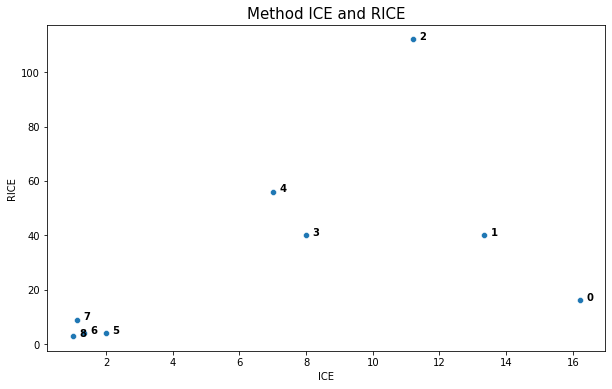

In [19]:
plt.figure(figsize=(10,6))
plt.title('Method ICE and RICE', size=15)
sns.scatterplot(x=hyp_all['ICE'], y=hyp_all['RICE'])
for line in range(0,hyp_all.shape[0]):
     plt.text(hyp_all.ICE[line]+0.2, 
              hyp_all.RICE[line], 
              hyp_all.index[line], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

### Conclusion

According to ICE and RICE frameworks I would consider to check 1 and 8 hypotheses, since both of them have a high score and appear in both frameworks. The 8 hypothesis appears the most promisisng in rICE framework because we considered also Reach parameter. Means that future changes will see the biggest amount of users. Impact on users will be pretty high and we are almost sure in results. Also it will take a medium efforts from our side. The 1 hypothesis will not reach a lot of customers but will have a high impact on them, with pretty high level of confidence and medium efforts from our side it makes this hypothesis worth to review and checking.

## A/B Test Analysis

### Graph cumulative revenue by group. Make conclusions and conjectures.

First of all we need to be sure that we don't have dulicate values in our data.

In [20]:
group_counter = orders.groupby('visitorId')['group'].nunique()
damaged_users = group_counter[group_counter > 1].index
print(len(damaged_users))

58


In [21]:
orders = orders[orders.visitorId.isin(damaged_users) == False]


In [22]:
ordersgroup = orders[['date', 'group']].drop_duplicates()

In [23]:
ordersagg = ordersgroup.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 


In [24]:
visitsagg = visits.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group']) 


In [25]:
cumdata = ordersagg.merge(visitsagg, left_on=['date', 'group'], right_on=['date', 'group'])
cumdata.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumdata.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


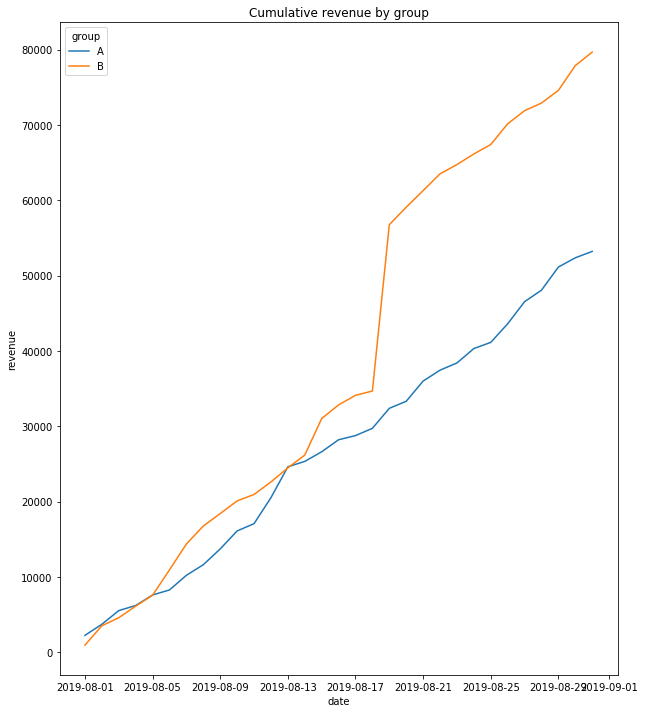

In [26]:
plt.figure(figsize=(10,12))
sns.lineplot(data=cumdata, x="date", y="revenue", hue="group")
plt.title("Cumulative revenue by group")
plt.show()

Revenue is rising throughout the whole test. However, revenue of B group is higher then revenue of A group and started to raise more 17-08-2019.

### Graph cumulative average order size by group. Make conclusions and conjectures.

In [27]:
cumdata['avgsize'] = cumdata['revenue'] / cumdata['orders']
cumdata.head()

,date,group,orders,buyers,revenue,visitors,avgsize
0,2019-08-01,A,23,19,2266.6,719,98.547826
1,2019-08-01,B,17,17,967.2,713,56.894118
2,2019-08-02,A,42,36,3734.9,1338,88.926190
3,2019-08-02,B,40,39,3535.3,1294,88.382500
4,2019-08-03,A,66,60,5550.1,1845,84.092424


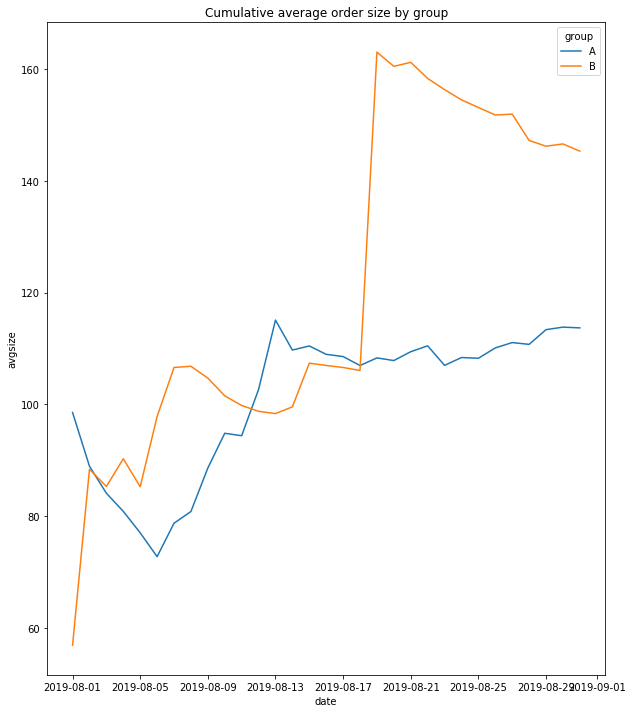

In [28]:
plt.figure(figsize=(10,12))
sns.lineplot(data=cumdata, x="date", y="avgsize", hue="group")
plt.title("Cumulative average order size by group")
plt.show()

As we see group B started to raise immediately. On the 13-08-2019 it dropped down compared with group A, maybe because some users from group A bought expensive items or placed a large orders, but after the average orders size from group B started to raise dramatticaly and shows better results then group A.

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [29]:
cumdataA = cumdata[cumdata['group']=='A'][['date','revenue', 'orders']]
cumdataB = cumdata[cumdata['group']=='B'][['date','revenue', 'orders']]

In [30]:
mergedcum = cumdataA.merge(cumdataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedcum.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


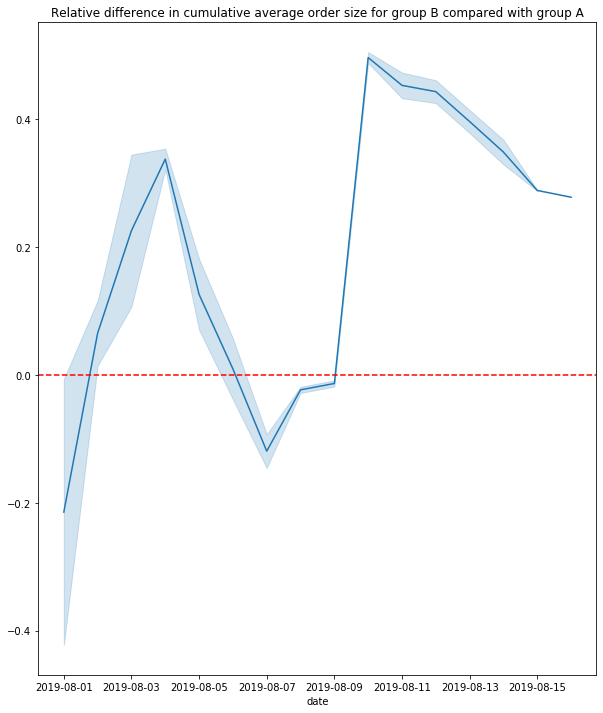

In [31]:
plt.figure(figsize=(10,12))
sns.lineplot(data=cumdata, x="date",y=(mergedcum['revenueB']/mergedcum['ordersB'])/(mergedcum['revenueA']/mergedcum['ordersA'])-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title("Relative difference in cumulative average order size for group B compared with group A")
plt.show()

From the relative difference plot we can see that still group B showing good results axcept of two moments from the start and in the beginning of August what could be explained that in group A were expensive orders that time. But after group B average order size grew up and stays on high level

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [32]:
ordersagg=ordersagg.sort_values(by=['date','group']) 
ordersagg.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [33]:
visitsagg=visitsagg.sort_values(by=['date','group'])
visitsagg.head()

,date,group,visits
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,1338
32,2019-08-02,B,1294
2,2019-08-03,A,1845


In [34]:
conmerged = ordersagg.merge(
   visitsagg, left_on=['date', 'group'], right_on=['date', 'group'])
conmerged.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
conmerged.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [35]:
conmerged['conversion_rate']=conmerged['orders']/conmerged['visits']
conmerged.head()

,date,group,orders,buyers,revenue,visits,conversion_rate
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


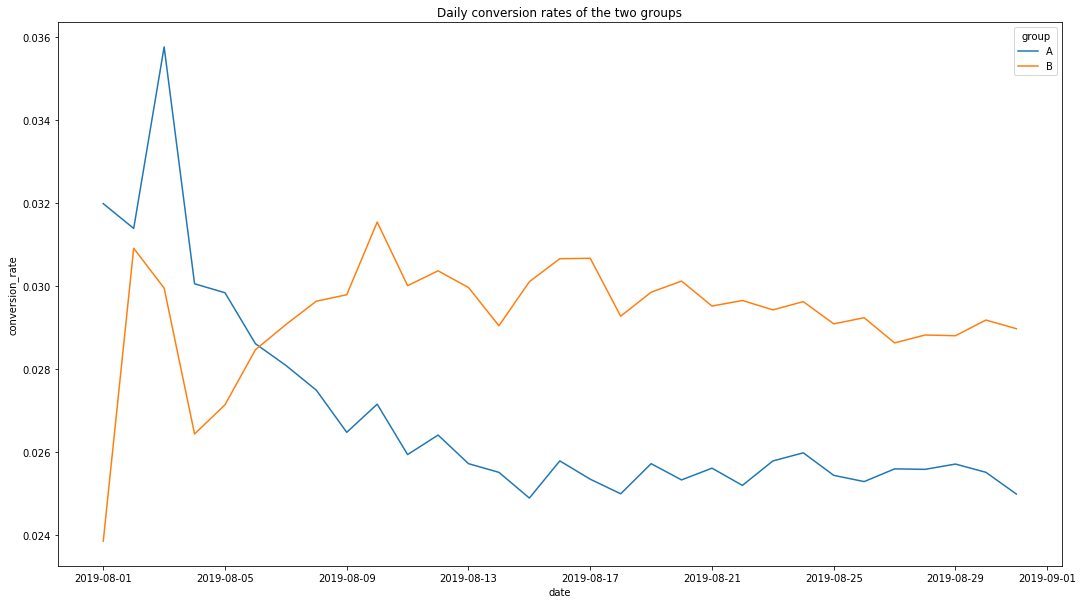

In [36]:
plt.figure(figsize=(18,10))
sns.lineplot(data=conmerged, x="date", y="conversion_rate", hue="group")
plt.title("Daily conversion rates of the two groups")
plt.show()

In [37]:
# overoll conversion:
overcon = conmerged.groupby(by='group').sum()
overcon

,orders,buyers,revenue,visits,conversion_rate
group,,,,,
A,7904,7469,840331.0,305673,0.832994
B,9038,8782,1216292.8,307092,0.907756


We can see that conversion rate for B group started grow dramatically from the beginning and remains higher than conversion rate of A group

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [38]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


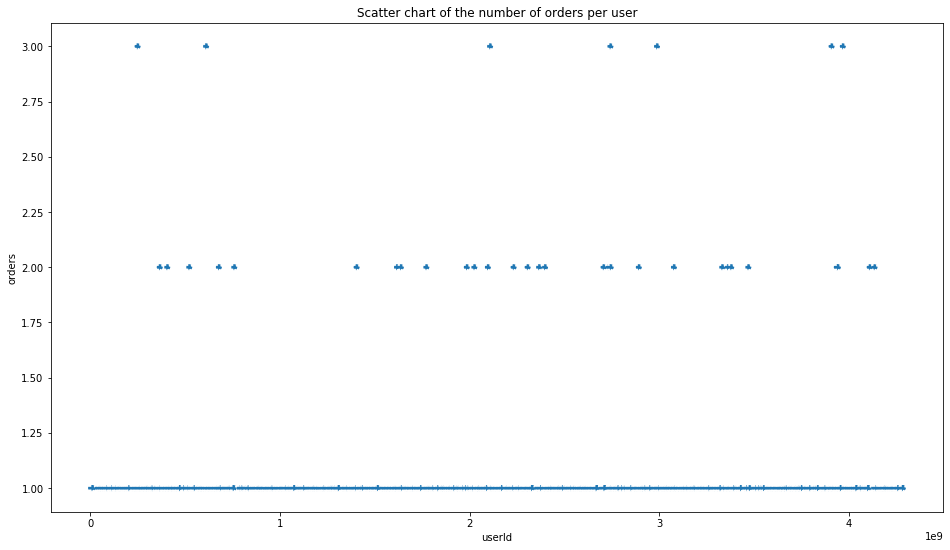

In [39]:
plt.figure(figsize = (16,9))
kwargs  =   {'edgecolor':"w",
             'linewidth':2,
             'linestyle':':',
            }
sns.scatterplot(x = "userId", y = "orders", data = ordersByUsers, sizes = (200, 500), **kwargs)
plt.title("Scatter chart of the number of orders per user")
plt.show()

The majority of users placed only 1 order, but we have some users who made more then 1 order as we see on scatterplot.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.


In [40]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


95th and 99th percentiles for the number of orders per user are: 2 and 4 accordingly. On the scatterplot we saw a lot of users who made 2 orders, and only some made 4 and more. So data becomes anomaly if user placed more then 2 orders.

### Plot a scatter chart of order prices. Make conclusions and conjectures.

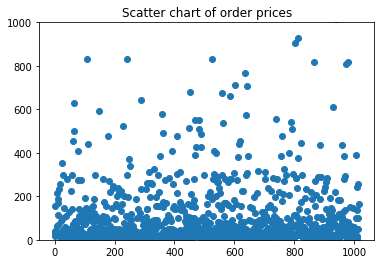

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0, 1000)
plt.title("Scatter chart of order prices")
plt.show()

The majority of orders cost not more then 2500USD, but we have some orders which cost more, even 20000USD

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [42]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[280.8   414.275 830.3  ]


No more than 5% of orders cost more than 435.54USD, and no more than 1% cost more than 900.904USD. We can consider, that all orders which cost more then 435USD become an anomaly.

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [43]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.sample(5)

,userId,orders
337,3160828523,1
43,417213830,1
335,3149228032,1
387,3622537133,1
104,997945223,1


In [44]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersB.sample(5)

,userId,orders
525,4279090005,1
301,2396134342,1
343,2696039803,1
110,856264494,1
47,368204224,1


In [45]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [46]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Let's set up the significant level as 0.05. And formulate hypotheses. 
Null hypothesis: The groups' conversion rates have no statistically significant differences.
Alternative hypothesis: The groups' conversion rates have statistically significant differences.

In [47]:
alpha = 0.05

In [48]:
results = st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')
print( "{0:.3f}".format(results.pvalue))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


The p-value is considerably lower than 0.05, so we reject the null hypothesis. The raw data analysis shows us that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 13.8%

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

Null hypothesis: The groups' average order size have no statistically significant differences.
Alternative hypothesis: The groups' average order size have statistically significant differences.

In [50]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], alternative='two-sided'))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.431
0.278


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. And the relative difference is 25.2%

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

First of all we need to remove anomalies from our data.

In [51]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99][0])]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.shape

(70,)

We have total 74 anomalies in data.

In [52]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleAFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [53]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
sampleBFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Let's set up the significant level as 0.05. And formulate hypotheses. 
Null hypothesis: The groups' conversion rates have no statistically significant differences.
Alternative hypothesis: The groups' conversion rates have statistically significant differences.

In [54]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.003
0.251


The p-value is considerably lower than 0.05, so we reject the null hypothesis. The filtered data analysis shows us that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 17.3%

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [55]:
print('{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1], alternative='two-sided'))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.418
-0.037


The p-value increased,and still we can't reject null hypothesis and can consider that there are no statistically significant differences in averagre order size between the groups. 


### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

After reviewing the test results I would stop the test, consider the group B is the leader. All graphes and parameters we exlored during the test shows us that group B brings us more revenue and conversion rate compared with group A.

# Overall conclusion

We have 3 datasets. First one with hypotheses has 9 rows and 5 columns. Second with orders has 1197 rows and 5 columns, and last one with visits has 62 and 3 columns. Upon dowloading datasets I converted columns with dates to datetime type. So after I received optimized datasets for further work. After checking there were no missing values or mistakes in data. So it is ready to work with. I checked a removed duplicates in order table in order to not have same users in different groups. 
According to ICE and RICE frameworks I would consider to check 1 and 8 hypotheses, since both of them have a high score and appear in both frameworks. The 8 hypothesis appears the most promisisng in rICE framework because we considered also Reach parameter. Means that future changes will see the biggest amount of users. Impact on users will be pretty high and we are almost sure in results. Also it will take a medium efforts from our side. The 1 hypothesis will not reach a lot of customers but will have a high impact on them, with pretty high level of confidence and medium efforts from our side it makes this hypothesis worth to review and checking.
Revenue is rising throughout the whole test. However, revenue of B group is higher then revenue of A group and started to raise more 17-08-2019.
 Group B started to raise immediately. On the 13-08-2019 it dropped down compared with group A, maybe because some users from group A bought expensive items or placed a large orders, but after the average orders size from group B started to raise dramatticaly and shows better results then group A.
 From the relative difference plot we can see that still group B showing good results axcept of two moments from the start and in the beginning of August what could be explained that in group A were expensive orders that time. But after group B average order size grew up and stays on high level.
 We can see that conversion rate for both A and B groups are almost the same. Even if in group B we have more orders and visits.
 The majority of users placed only 1 order, but we have some users who made more then 1 order as we see on scatterplot. 95th and 99th percentiles for the number of orders per user are: 2 and 4 accordingly. On the scatterplot we saw a lot of users who made 2 orders, and only some made 4 and more. So data becomes anomaly if user placed more then 2 orders.
 The majority of orders cost not more then 2500USD, but we have some orders which cost more, even 20000USD. No more than 5% of orders cost more than 435.54USD, and no more than 1% cost more than 900.904USD. We can consider, that all orders which cost more then 435USD become an anomaly.
 The raw data analysis shows us that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 13.8%
 
 